<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit6/YangChau_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

elpd_loo is only useful when used to compare two different models. Otherwise, it's value doesn't have meaning if it's not used in comparison with two models. This is because elpd_value represents the log probability of the observed data fitting under the curve of the model. But, because without another model, there is no reference point to say whether the performance is good or bad, the number on its own simply doesn't mean anything.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model not only predicts reality but also the random fluctuations within the observed data, rendering it useless in real world situations, where those random fluctuations are not important.

**Task3**:

How do we mitigate overfitting?

We naturally combat overfitting by introducing our priors. Additionally, by favoring more simplistic model, overfitting becomes less likely. There are also online tools like bambi which incorporate specific practices automatically to fight against overfitting. These features include the creation of default priors, tools that can identify overfitting, and LOO-CV, which grades a model on its ability to generalize, as opposed to being overly specific, which is indicative of an overfitting model. Also, you should always start with a causal diagram, which not only gives you a better understanding of your model but also mitigates overfitting by giving structure and logic to the way you select you predicting variables.

**Task4**:

How do we mitigate underfitting?

Underfitting is when the model doesn't predict on the observed data to any meaningful degree, resulting in a very low elpd_loo value. In order to mitigate this, we specifically compare and contrast models to find the best one according to elpd_loo. Because elpd_loo represents the log probability of the observed data fitting under the curve graphed by the model, the best elpd_loo will result in the most data being predicted, and by using that model, we will have minimal underfitting. It's important however to not take this process too far because it could result in an extreme in the opposite end of the spectrum, or overfitting. Last but not least, starting off the process with a causal diagram will aid both in mitigating overfitting and underfitting.

**Task5**:

Why would we want more than one predictor in a model?

Have more than one predictor means that our model is more generalized, and thus can be used in a more versatile sense when encountering unobserved data. Additionally, adding multiple predictors tends to improve the accuracy of a model, which makes it more competitive in comparison to other models when compared using elpd_loo. Finally, relying on only one predictor means that specifc quirks of that data may confound or confuse your model and lead it away from what reality actually is. By introducing several predictors you can compensate for that.

**Task6**:

Can we have too many predictors? How would we now?

Yes, you can have too many predictors. When you have too many predictors, the model tends to overfit on the data, and loses usefulness in the real world. Also, considering things from a usability stand point, the model's utility will significantly diminish as you introduce more and more predictors into it which, drastically increases the complexity and makes it harder and harder to approach and use for a prospective user.

**Task7**:

What is variable selection, and how does it work?

Variable selection is a process of planning guided by common sense and logic that allows data scientists to ascertain which variables in a given scenario will be most useful to them. For example, if someone is trying to predict on a dataset that concerns the amount of icecream bought at a store based off several variables, what types of variables would they choose? Well, its logical to assume that the hotter the temperature, the more likely the store is to sell icecream. But what else influences the amount of icecream sold? How about something like the day of the week? That makes sense, more people will be around on the weekends and thus more icecream will be sold. Additionally, this process also means that you can look for relationships between variables. For example, if the dataset includes information on the humidity of the air on specific days, something that tends to have some influence or is influenced by temperature, then we could argue that this variable is something of a predictor for temperature, introducing another level of complexity to our model.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The three methods represent increments in complexity within the model. First, if we just added variables to the model as is standard without creating a hierarchcial model or relating variabels to eachother, the model will treat all variables the same, which it would not do in either of the two other models. Contrastingly, if you were to use the categorical variable in a hierarchical way, it would act as "governing" information that effects the model through the modification of newly formed categories or groups. Finally, in the last scenario, we are directly relating the categorical variable to x, essentially saying that our categorical variable can to some degree predict x. This introduces a further level of complexity that can vary depending on the depth and number of relationships present within a model.

On a more technical level, the modification of C's (categorical variable) purpose throughout each of these models effects the slope and x-intercept of the regression model. When it is used as standard, it only has influence on the infuence of the model, but when used in a hierarchical way, it can influence the slopes and intercepts of categories. And finally, if used in an interaction with the non categorical variable, it adjusts the slope and intercept of the model through interacting with the x variable.

**Task9**:


How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

bmb.interpret.plot_predictions()

Yes, you can, but only in specific scenarios where you have very few variables, Bambi has a function that prints out the internals of a given regression model. Breaking it down into a series of individual graphs that represent specific predictions your model has made with specific points in your data. Using this function, you can interpret your model and better understand how each chosen variable interacts with the overall whole, resulting in the predictions you see at that moment. In scenarios where you hvae many variables, you can still use this function, but it will not capture the only model, rather, you can use it to look at a few of your variables which, in conjunction with your causal diagram, will help you understand the internals of more complex models.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [22]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [23]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-nc1ypaw4
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-nc1ypaw4
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [24]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [25]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

- predictors free throw percentage and position (with position as a categorical predictor)


In [26]:
model_1 = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_1 = model_1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

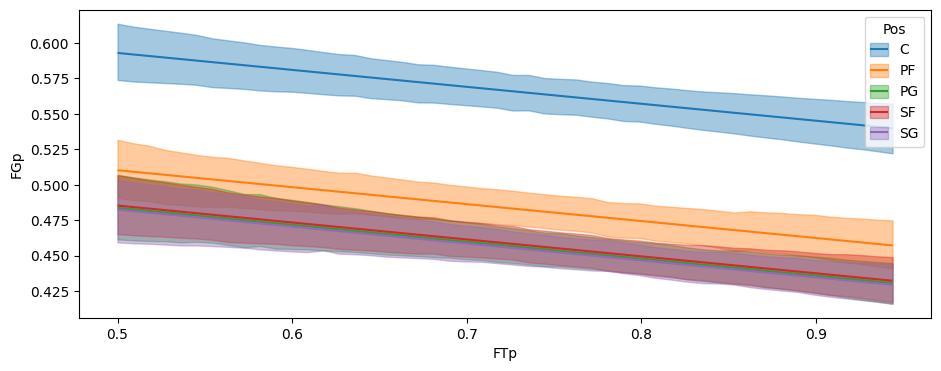

In [27]:
bmb.interpret.plot_predictions(model_1,
                               idata_1,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

- predictors free throw percentage and position (with position as a hierarchy)


In [28]:
model_2 = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_2 = model_2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 18 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

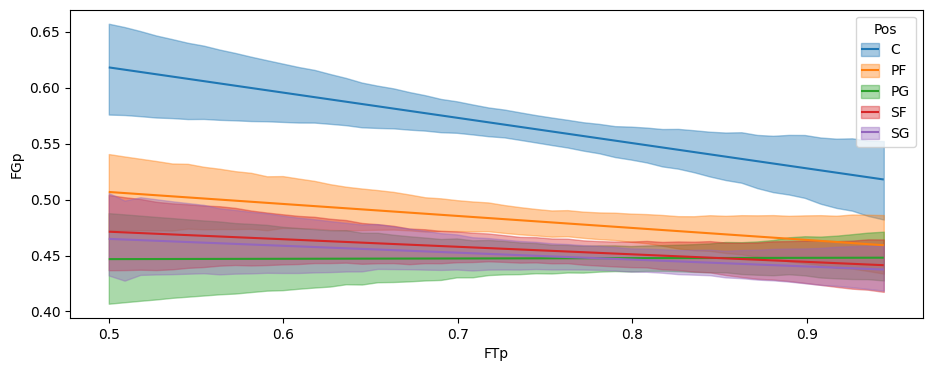

In [29]:
bmb.interpret.plot_predictions(model_2,
                               idata_2,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

- predictors free throw percentage and position (with position interacting with frew throw percentage)


In [30]:
model_3 = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)
idata_3 = model_3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

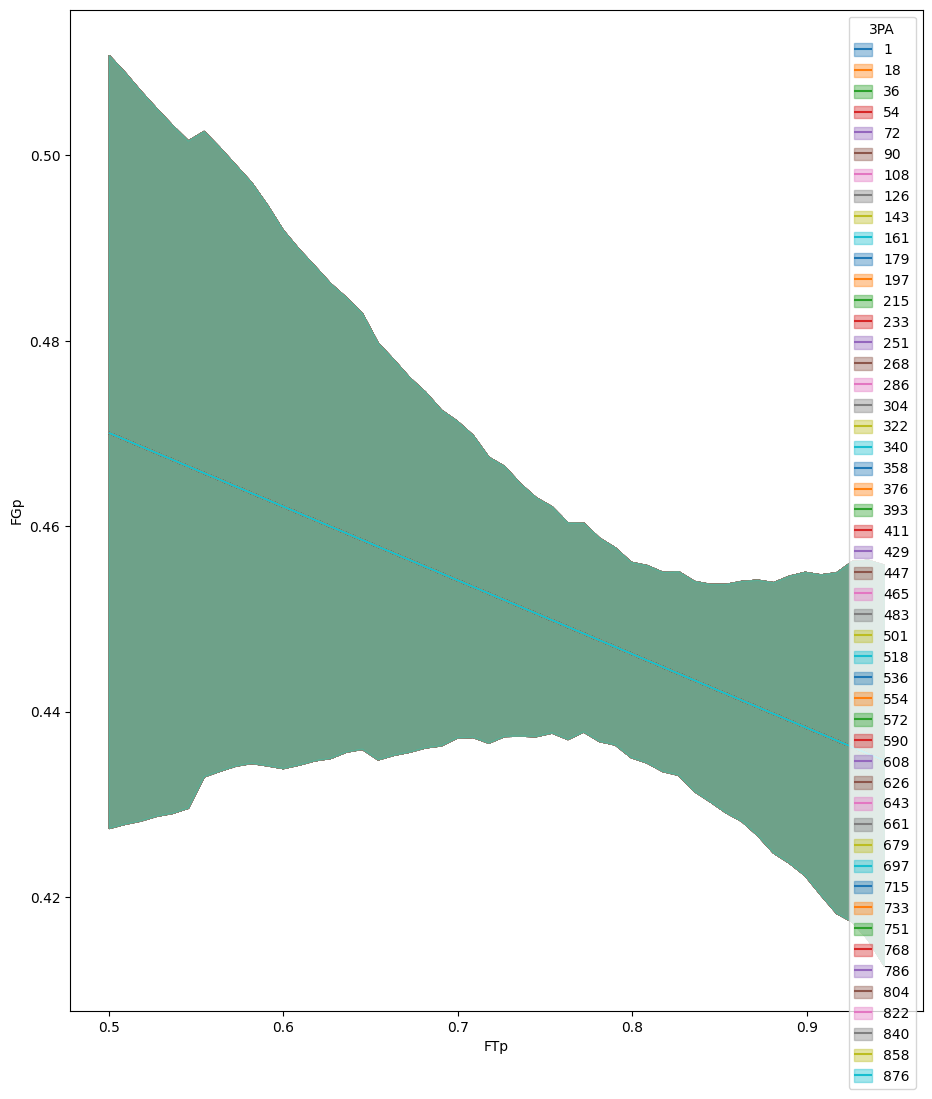

In [31]:
bmb.interpret.plot_predictions(model_3,
                               idata_3,
                               ["FTp","3PA"],
                               fig_kwargs={"figsize":(11, 13)})

- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors


In [32]:
model_4 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `FTp`:`3PA` + `FTp`:`Pos` + `3PA` : `Pos`", data=bb)
idata_4 = model_4.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

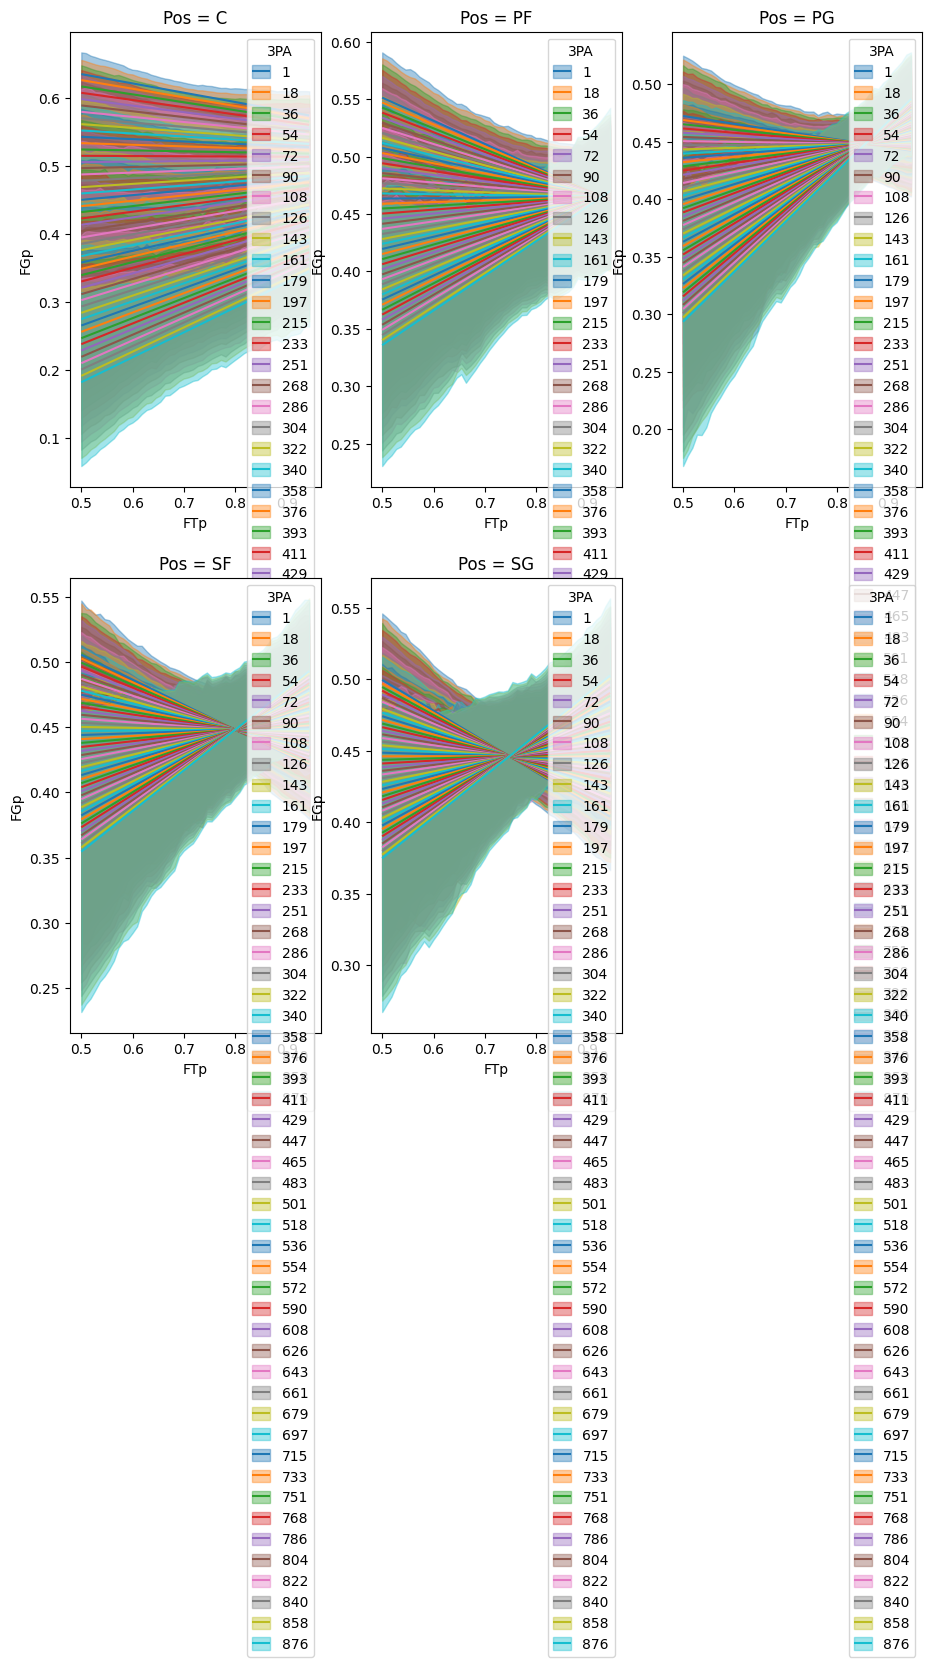

In [33]:
bmb.interpret.plot_predictions(model_4,
                               idata_4,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})

- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.
\

In [34]:
model_5 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `3PA` : `Pos`", data=bb)
idata_5 = model_5.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

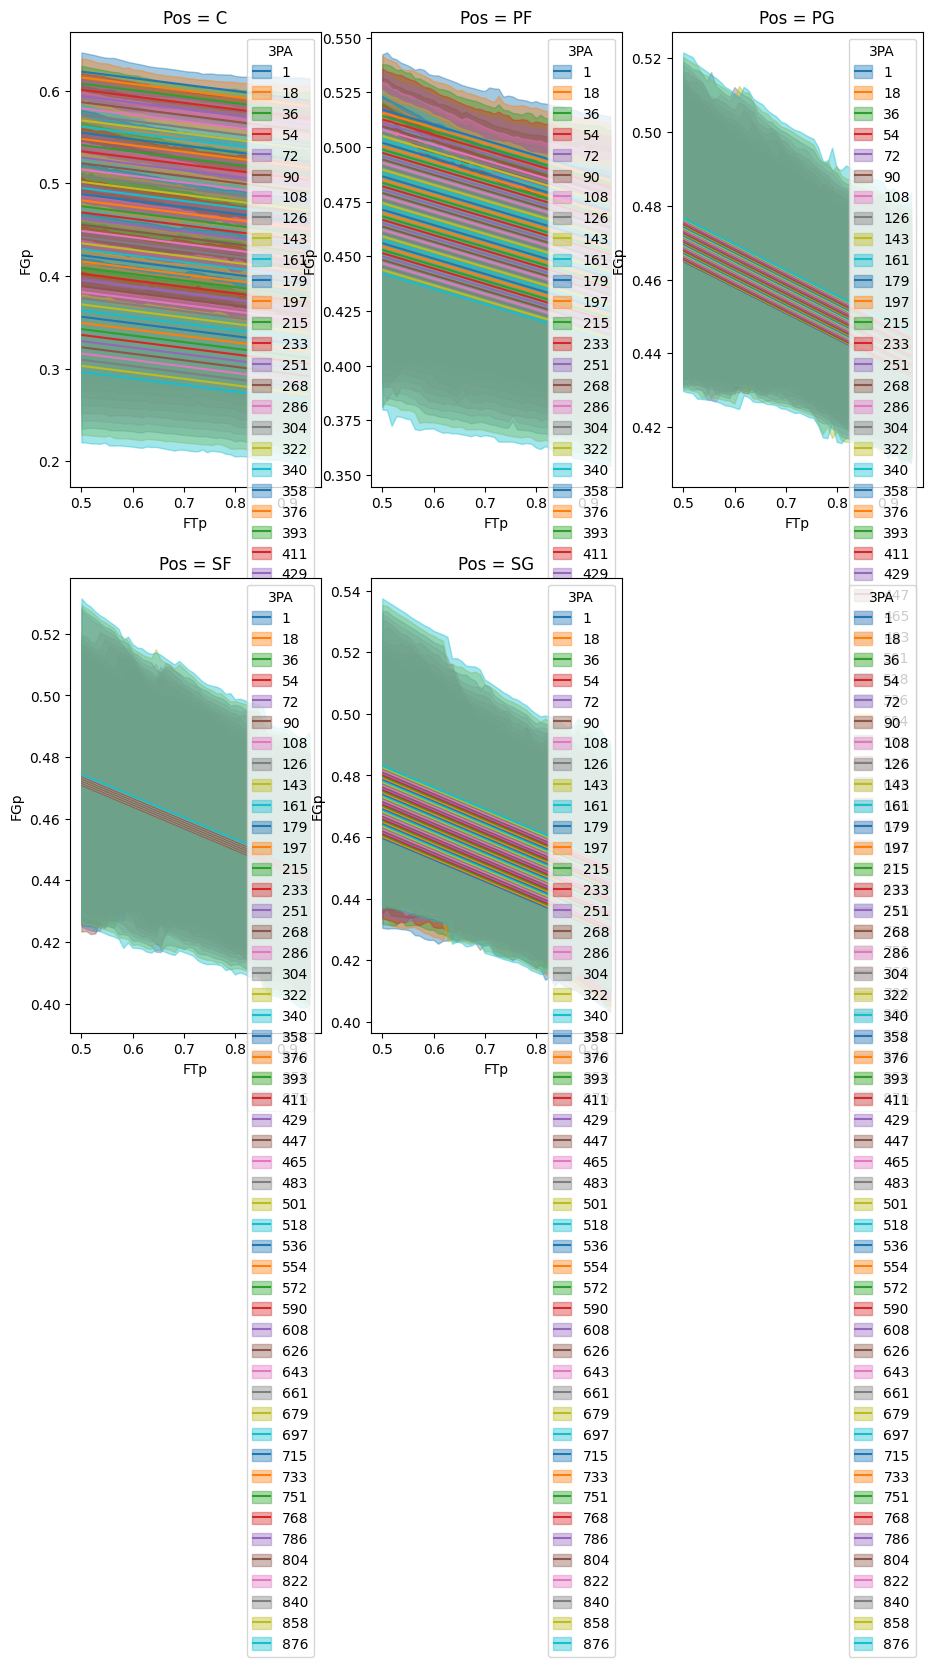

In [35]:
bmb.interpret.plot_predictions(model_5,
                               idata_5,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})

Comparison

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

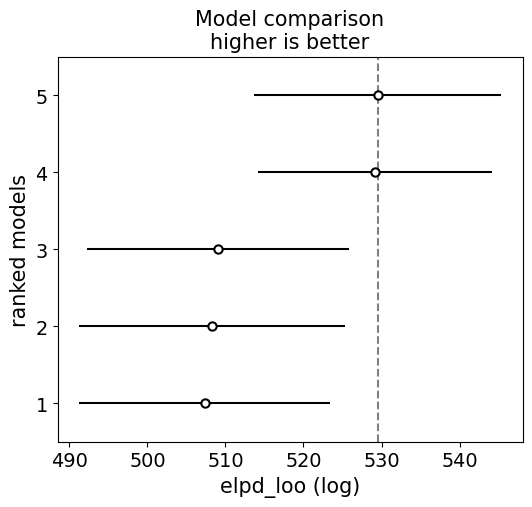

In [36]:

cmp = az.compare({"1":idata_1,"2":idata_2, "3":idata_3, "4":idata_4, "5": idata_5})
az.plot_compare(cmp)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to the comparison, the fifth model, or the model that uses interactions between 3 point attempts and positions. Similarly, #4, which also used interactions between variables also ranked highly between the 5 models. I believe the reason that #5 outperformed #4 despite the fact that #4 had more interactions between variables is because there is assuming an interaction between all three variables is untrue to reality. Which means that although #5 had less interaction, it had more accurate interactions.